In [1]:
from tensorflow import keras
import tensorflow.keras.backend as K
import tensorflow as tf
from tensorflow.keras.layers import Layer
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
DATA_FILE = "x.npy"

In [3]:
x = np.load(DATA_FILE)
img_shape = x.shape[1:]

In [4]:
class Sampling(Layer):
    def call(self, inputs):
        mean, log_var = inputs
        return K.random_normal(tf.shape(log_var)) * K.exp(log_var / 2) + mean

keras.utils.get_custom_objects().update({"Sampling": Sampling})

# Non-Variational Comparisson

In [5]:
non_variational_models = []

for file_name in os.listdir("../models"):
    # if "V" != file_name[0]:
    model = "../models/" + file_name
    non_variational_models.append(model)

../models/NB_R_7_384.h5
../models/NB_S_7_384.h5
../models/V_S_7_384.h5
../models/S_7_384.h5
../models/R_7_384.h5
../models/SB_S_7_384.h5
../models/relu_SB_S_7_384.h5
../models/relu_SB_R_7_384.h5
../models/V_R_7_384.h5
../models/SB_R_7_384.h5


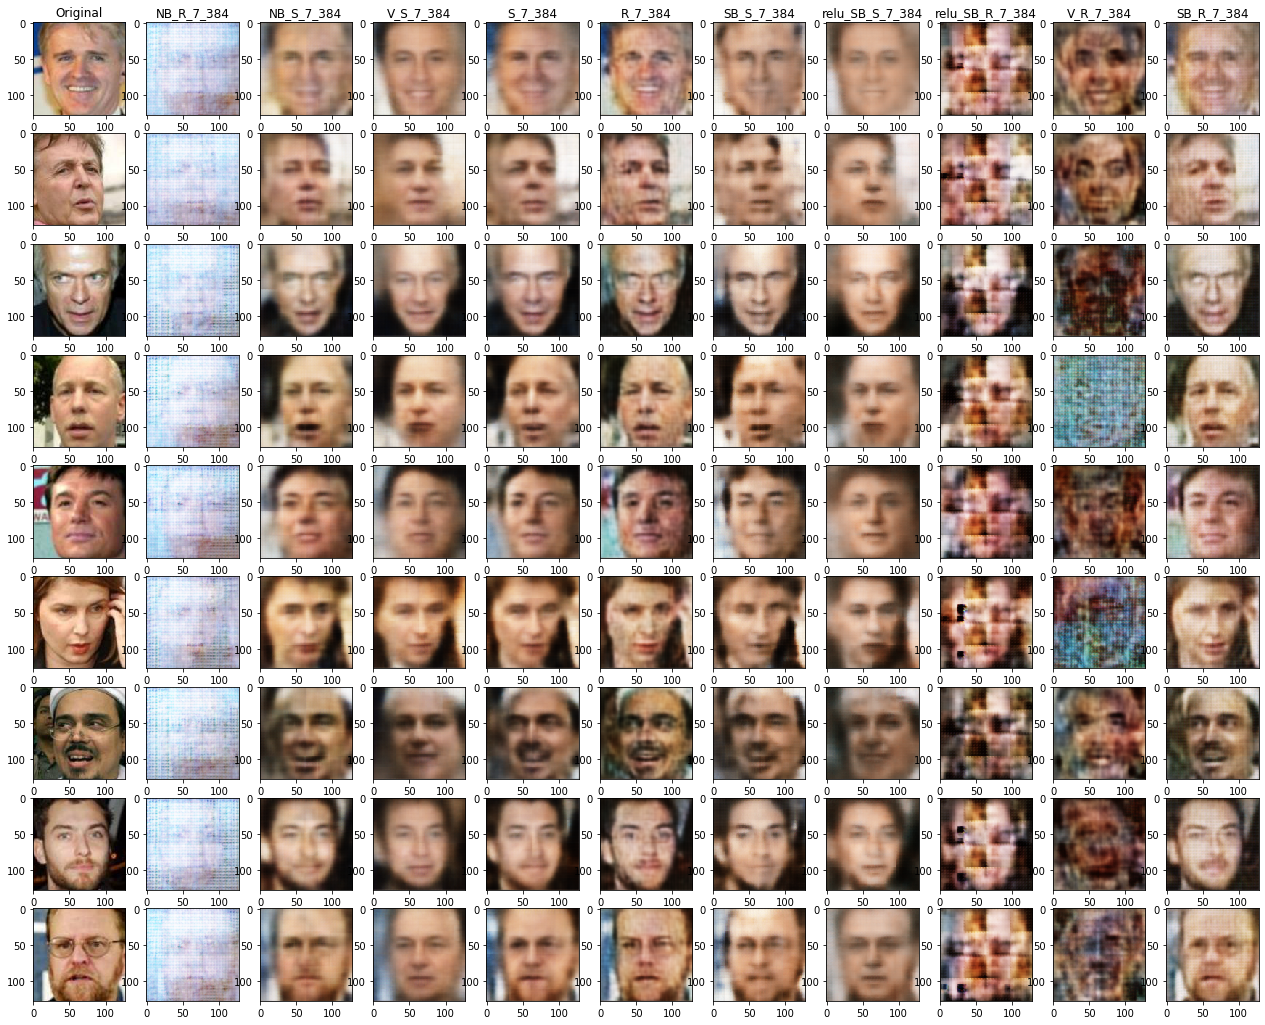

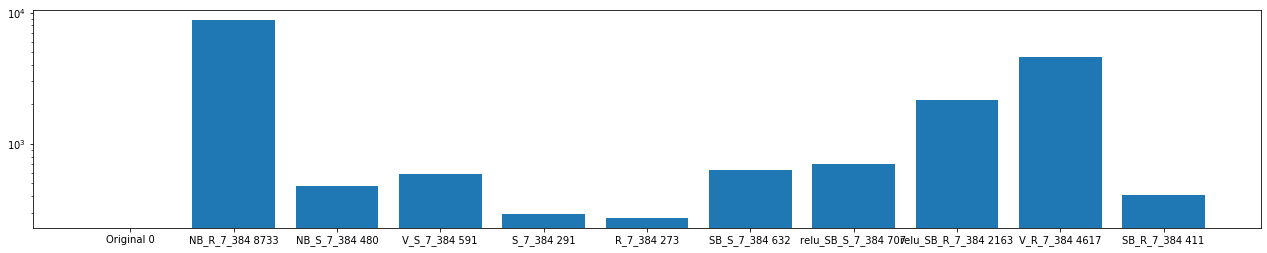

In [6]:
n_rows = 9

inds = np.random.randint(0, len(x), n_rows)
display_images = x[inds]

img_dict = {"Original": display_images}

for model_file in non_variational_models:
    print(model_file)
    model = keras.models.load_model(model_file)
    model_name = model_file.split("/")[-1].split(".")[0]
    img_dict[model_name] = model.predict(display_images)

fig, axs = plt.subplots(n_rows, len(non_variational_models) + 1)

titles = []
titles.extend(list(img_dict.keys()))

total_errors = np.zeros(len(titles))

for r, row in enumerate(axs):
    imgs = [img_dict[key][r] for key in titles]
    for c, ax in enumerate(row):
        original = display_images[r].astype(float)
        img = imgs[c].astype(float)

        error = ((original - img)**2).sum()
        total_errors[c] += error

        ax.imshow(img)
        if r == 0:
            ax.set_title(titles[c])


fig.set_size_inches(len(titles)*2, n_rows*2)
fig.savefig("../docs/non_variational.png")
fig.show()

fig, ax = plt.subplots()

errors = [err/n_rows for err in total_errors]
labels = []
for i, title in enumerate(titles):
    label = "%s %.0f" % (title, errors[i])
    labels.append(label)
ax.bar(np.arange(len(titles)), errors, tick_label=labels)
ax.set_yscale("log")
fig.set_size_inches(len(titles)*2, 4)
fig.show()


In [ ]:
stacked = keras.models.load_model("../models/S_7_384.h5")
recursive = keras.models.load_model("../models/R_7_384.h5")

display_images = x[0][:10]

reconstructions = recursive.predict(display_images)
basic_reconstructions = stacked.predict(display_images)

fig, axs = plt.subplots(5, 3)

titles = ["Original", "Stacked", "Recursive"]

for r, row in enumerate(axs):
    imgs = [x[0][r], basic_reconstructions[r], reconstructions[r]]
    for c, ax in enumerate(row):
        img = imgs[c].astype(float)
        ax.imshow(img)
        if r == 0:
            ax.set_title(titles[c])

fig.set_size_inches(6, 9)
fig.savefig("stacked_vs_recursive.png")
fig.show()

